# Analisis Exploratorio de datos para el caso de estudio de abandono de clientes y Analisis de segmentación de clientes.

In [299]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import plotly.graph_objects as go
# import pandas_profiling as pp

# Exploración de variables categoricas: conteos y proporciones.

In [300]:
datos = pd.read_excel(r'C:\Users\carlo\Syngenta\Projects for Analysis - General\Data processing\Output\Customer_Churn.xlsx')
datos

,bp_id,Estado,Territorio,FechaRegistro,Material.Number,Temporada,SO,Linea_Negocio,Date_Last,CohortDay,...,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Tiempo_ultima_compra,Anio_Registro,Cliente_Nuevo,Antiguedad,percentile_75,Compra_unica,Churn
0,21107645,Nayarit,A9442B,2017-11-17,29183,OI,3CR,OT,2019-01-16,2019-01-16,...,0.0,0.0,0.0,1979,2017,False,2404,561,False,True
1,21107259,Baja California,A5142A,2017-11-17,26867,OI,3CR,HS,2019-01-18,2019-01-16,...,0.0,0.0,0.0,1977,2017,False,2404,561,False,True
2,21107305,Chihuahua,A5642C,2017-11-17,32728,OI,3CR,FG,2019-02-13,2019-02-13,...,0.0,0.0,0.0,1951,2017,False,2404,561,False,True
3,21108163,Chiapas,A5842F,2017-11-17,42077,OI,3CR,HS,2019-02-25,2019-02-14,...,0.0,0.0,0.0,1939,2017,False,2404,561,False,True
4,21251653,Estado de México,A5442A,2018-09-26,13215,OI,3CR,FG,2019-03-14,2019-03-14,...,0.0,0.0,0.0,1922,2018,False,2091,561,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,21535330,Estado de México,A5442O,2022-06-07,65439,OI,3CR,FG,2024-12-04,2023-05-24,...,0.0,0.0,0.0,170,2022,False,741,561,False,False
656,26001363,Puebla,A9512A,2023-06-13,58027,PV,3CR,IN,2024-12-04,2023-04-10,...,0.0,0.0,0.0,170,2023,False,370,561,False,False
657,26004216,Zacatecas,A5742J,2023-06-28,72341,PV,3CR,HS,2024-12-04,2023-04-08,...,0.0,0.0,0.0,170,2023,False,355,561,False,False
658,26017877,Michoacán de Ocampo,A9142I,2023-07-09,40749,OI,3CR,FG,2024-12-04,2023-09-10,...,0.0,0.0,0.0,170,2023,False,344,561,False,False


In [301]:
datos.dtypes

bp_id                            int64
Estado                          object
Territorio                      object
FechaRegistro           datetime64[ns]
Material.Number                  int64
Temporada                       object
SO                              object
Linea_Negocio                   object
Date_Last               datetime64[ns]
CohortDay               datetime64[ns]
Ship_to                          int64
Devolucion                       int64
Volumen                        float64
Consumo                        float64
Frec                             int64
Venta_2020                     float64
Venta_2021                     float64
Venta_2022                     float64
Venta_2023                     float64
Compro                           int64
Crecimiento_21vs20             float64
Crecimiento_22vs21             float64
Crecimiento_23vs22             float64
Tiempo_ultima_compra             int64
Anio_Registro                    int64
Cliente_Nuevo            

Definimos las variables categoricas nominales y ordinales, así como las variables numericas continuas y discretas que vamos a utilizar en este analisis.

In [302]:
vard = ['Territorio',
        'Estado',
        'Cliente_Nuevo',
        'Anio_Registro',
        'Compra_unica',
        'Material.Number',
        'Temporada',
        'SO',
        'Linea_Negocio'
    ]

varc = [
            'Antiguedad',
            'Volumen',
            'Consumo',
            # 'N_Material',
            'Ship_to',
            'Frec',
            'Tiempo_ultima_compra',
            'Devolucion',
            'Venta_2020',
            'Venta_2021',
            'Venta_2022',
            'Venta_2023',
            'Crecimiento_21vs20',
            'Crecimiento_22vs21',
            'Crecimiento_23vs22'
    ]

vart = ['y']
um = ['ID']

In [303]:
datos[vard] = datos[vard].astype(object)
# datos['Cliente_Nuevo'] = datos['Cliente_Nuevo'].map({1: True, 0: False})

# Datos faltantes

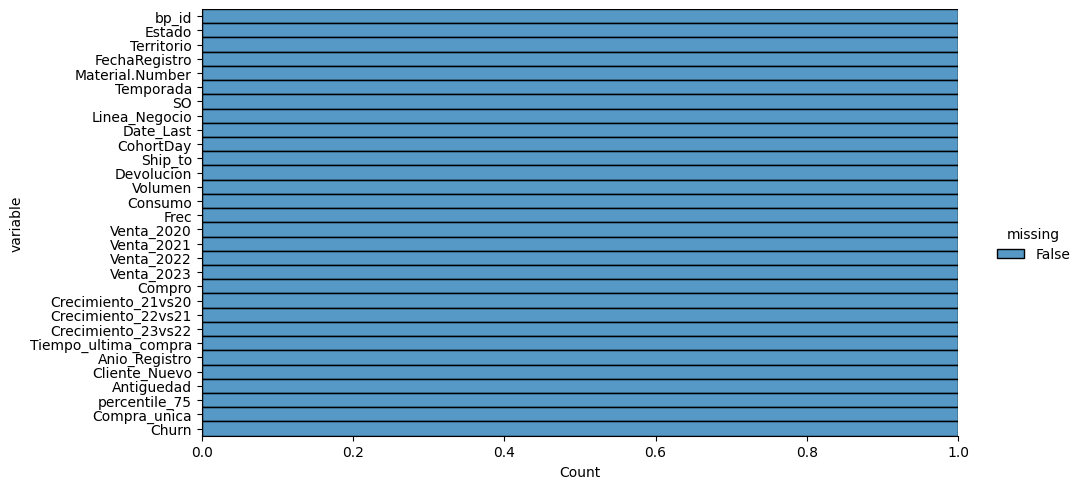

In [304]:
(
    datos
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

# Analisis Univariado

## Preludio: ¿Que estadisticos describen el conjunto de datos?
Todas las variables

In [305]:
datos.describe(include='all')

,bp_id,Estado,Territorio,FechaRegistro,Material.Number,Temporada,SO,Linea_Negocio,Date_Last,CohortDay,...,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Tiempo_ultima_compra,Anio_Registro,Cliente_Nuevo,Antiguedad,percentile_75,Compra_unica,Churn
count,6.600000e+02,660,660,660,660.0,660,660,660,660,660,...,660.000000,660.000000,660.000000,660.000000,660.0,660,660.000000,660.0,660,660
unique,NaN,32,183,NaN,149.0,2,3,7,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,2,NaN,NaN,2,2
top,NaN,Jalisco,A5842A,NaN,1001368.0,PV,3CR,FG,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,False,NaN,NaN,False,False
freq,NaN,81,21,NaN,26.0,348,622,224,NaN,NaN,...,NaN,NaN,NaN,NaN,294.0,646,NaN,NaN,659,495
mean,2.172805e+07,NaN,NaN,2019-10-05 10:21:49.090909184,NaN,NaN,NaN,NaN,2023-07-28 07:29:27.272727296,2020-09-06 22:43:38.181818368,...,0.386873,1.068556,0.150585,414.427273,NaN,NaN,1716.568182,561.0,NaN,NaN
min,2.110724e+07,NaN,NaN,2017-05-12 00:00:00,NaN,NaN,NaN,NaN,2019-01-16 00:00:00,2019-01-14 00:00:00,...,-1.683817,-1.226515,-3.733961,12.000000,NaN,NaN,84.000000,561.0,NaN,NaN
25%,2.110864e+07,NaN,NaN,2017-11-17 00:00:00,NaN,NaN,NaN,NaN,2022-12-04 00:00:00,2019-02-27 00:00:00,...,-0.070245,0.000000,-0.304303,82.000000,NaN,NaN,1073.250000,561.0,NaN,NaN
50%,2.125301e+07,NaN,NaN,2018-10-19 12:00:00,NaN,NaN,NaN,NaN,2024-03-27 00:00:00,2019-09-27 00:00:00,...,0.000000,0.000000,0.000000,170.000000,NaN,NaN,2067.500000,561.0,NaN,NaN
75%,2.148480e+07,NaN,NaN,2021-07-09 18:00:00,NaN,NaN,NaN,NaN,2024-10-01 00:00:00,2022-04-26 00:00:00,...,0.000000,0.276961,0.000000,561.000000,NaN,NaN,2404.000000,561.0,NaN,NaN
max,2.608655e+07,NaN,NaN,2024-03-25 00:00:00,NaN,NaN,NaN,NaN,2024-12-04 00:00:00,2024-05-25 00:00:00,...,81.269462,180.702826,51.059477,1979.000000,NaN,NaN,2593.000000,561.0,NaN,NaN


solo las númericas

In [306]:
datos[varc].describe(include=[np.number])

,Antiguedad,Volumen,Consumo,Ship_to,Frec,Tiempo_ultima_compra,Devolucion,Venta_2020,Venta_2021,Venta_2022,Venta_2023,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22
count,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000
mean,1716.568182,9.844150e+04,3.240792e+07,1.884848,259.171212,414.427273,6.406061,5.246158e+06,5.795954e+06,7.125592e+06,6.737282e+06,0.386873,1.068556,0.150585
std,770.147271,3.485376e+05,1.047367e+08,4.051124,565.748057,522.229959,17.093476,1.743300e+07,1.938061e+07,2.327737e+07,2.283119e+07,4.556873,8.972369,2.489496
min,84.000000,0.000000e+00,-3.637979e-12,1.000000,0.000000,12.000000,0.000000,-5.224325e+05,-4.780139e+06,-2.995854e+05,-4.839962e+05,-1.683817,-1.226515,-3.733961
25%,1073.250000,2.538742e+03,1.135645e+06,1.000000,20.000000,82.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.070245,0.000000,-0.304303
50%,2067.500000,1.216659e+04,4.915612e+06,1.000000,68.500000,170.000000,1.000000,8.857074e+04,1.748332e+05,8.558746e+05,9.651400e+05,0.000000,0.000000,0.000000
75%,2404.000000,5.316265e+04,1.759043e+07,2.000000,243.500000,561.000000,5.000000,2.793452e+06,3.343715e+06,4.833835e+06,3.873114e+06,0.000000,0.276961,0.000000
max,2593.000000,5.441166e+06,1.313727e+09,71.000000,6308.000000,1979.000000,211.000000,2.357023e+08,2.622097e+08,3.112423e+08,2.605017e+08,81.269462,180.702826,51.059477


solo las categoricas

In [307]:
datos[vard].describe(include=object)

,Territorio,Estado,Cliente_Nuevo,Anio_Registro,Compra_unica,Material.Number,Temporada,SO,Linea_Negocio
count,660,660,660,660,660,660,660,660,660
unique,183,32,2,8,2,149,2,3,7
top,A5842A,Jalisco,False,2017,False,1001368,PV,3CR,FG
freq,21,81,646,294,659,26,348,622,224


## ¿Cómo puedo visualizar conteos?

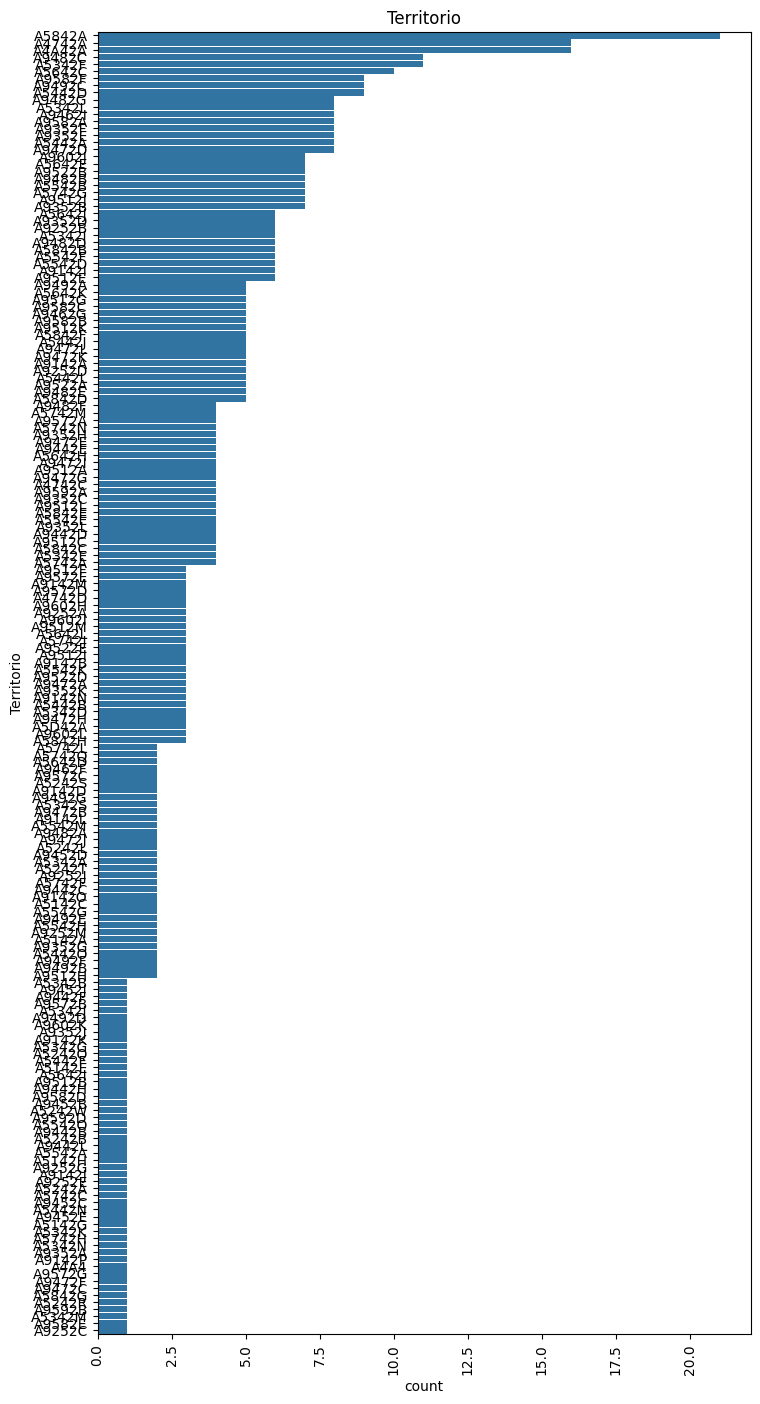

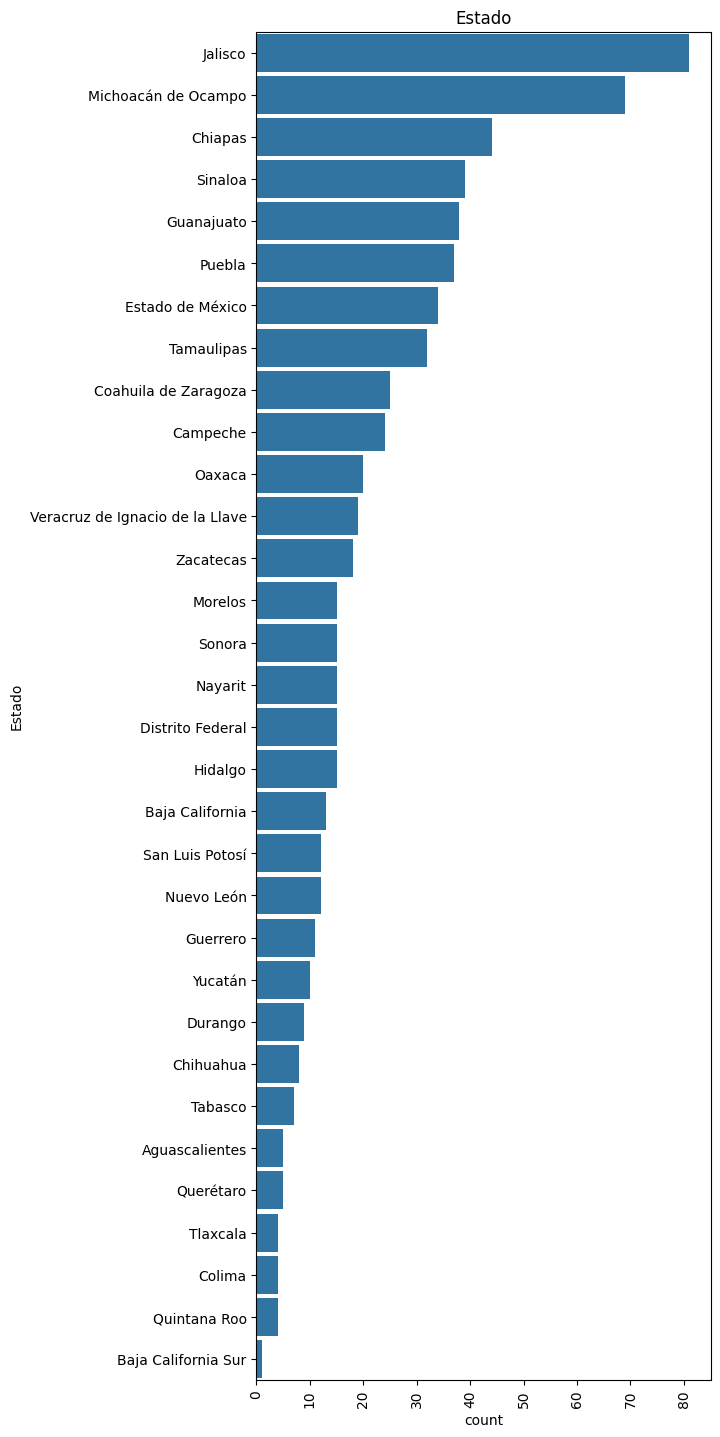

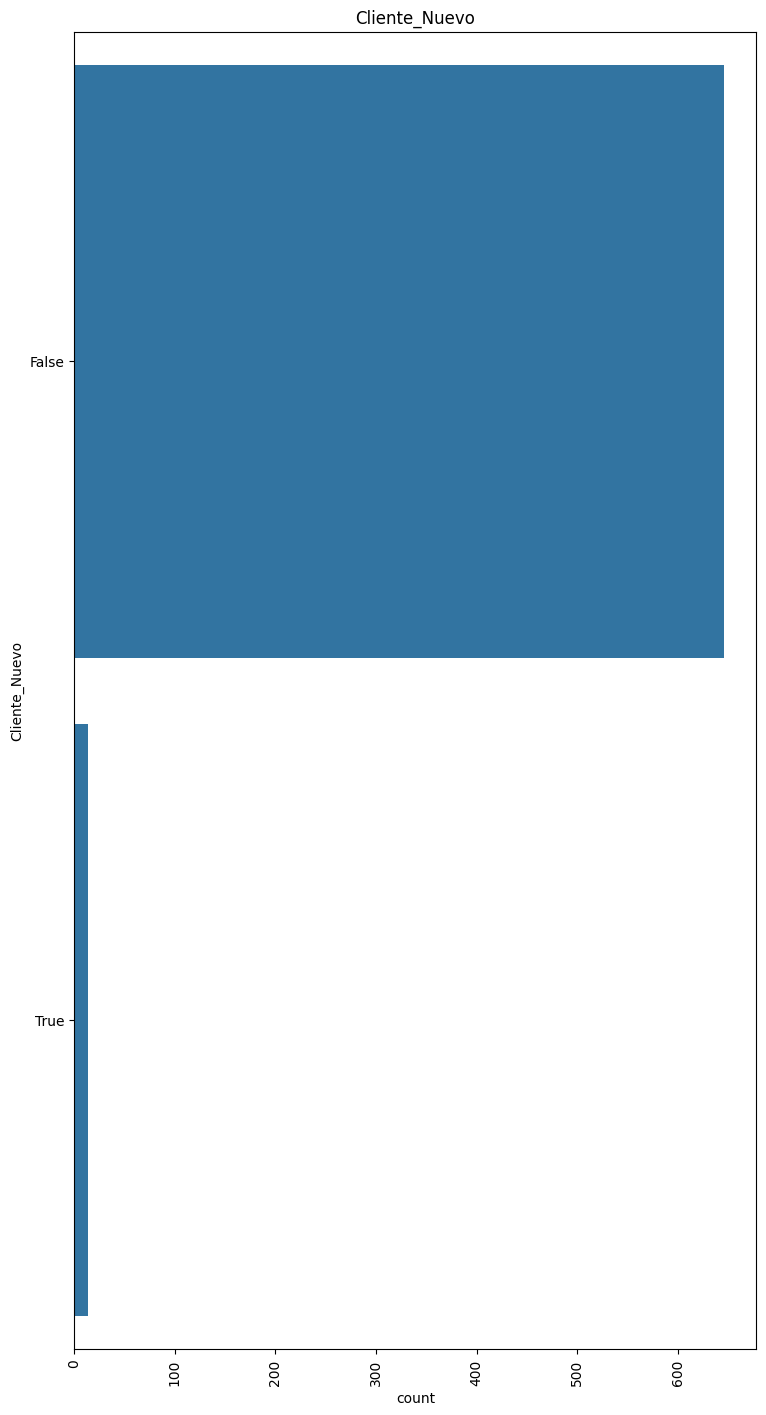

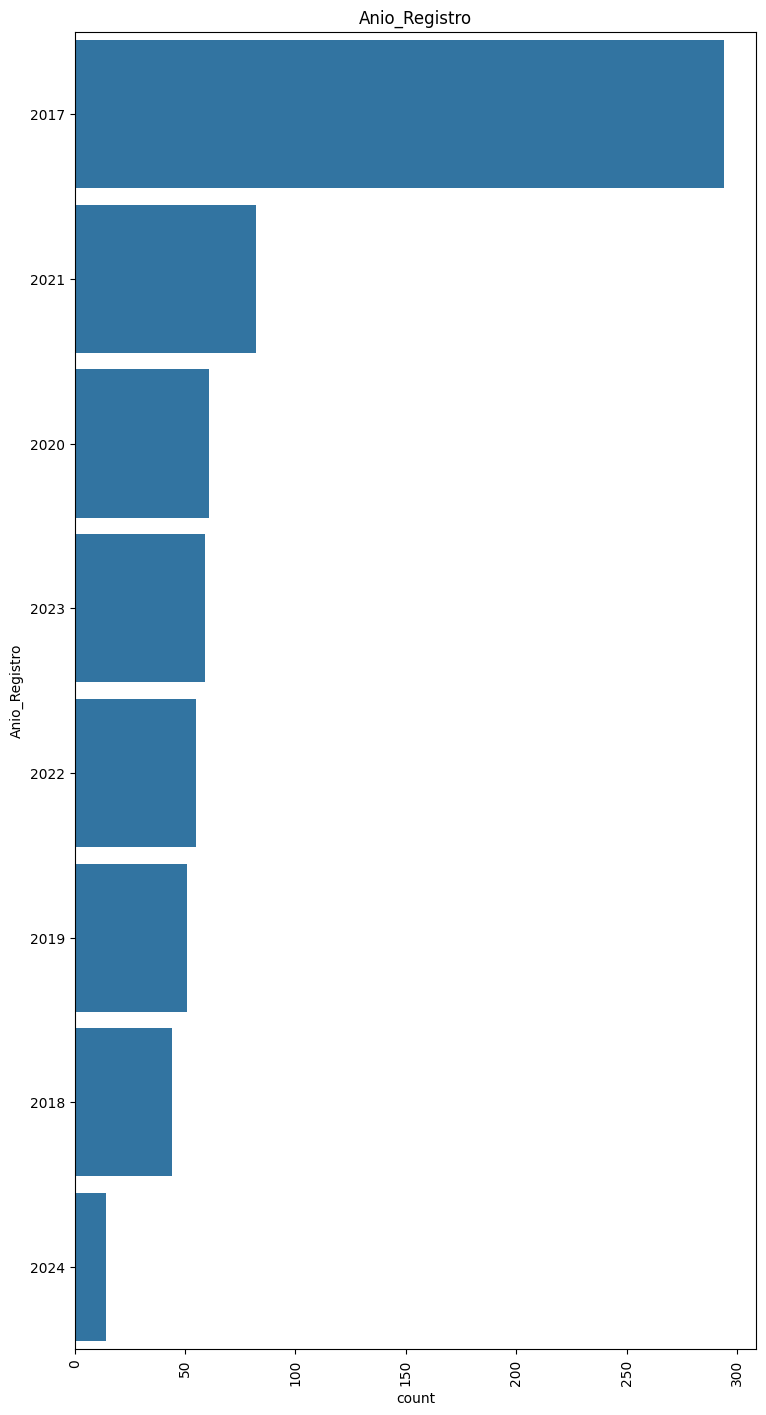

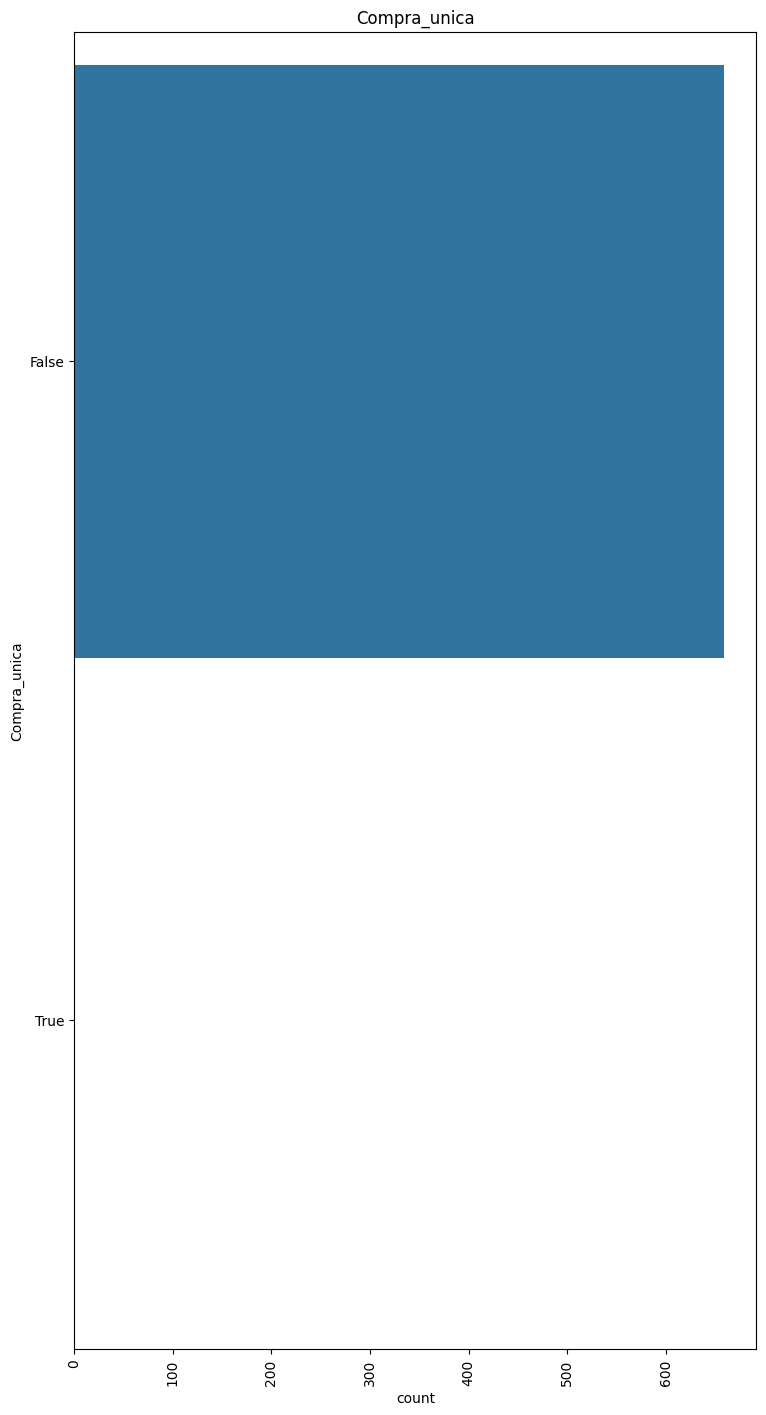

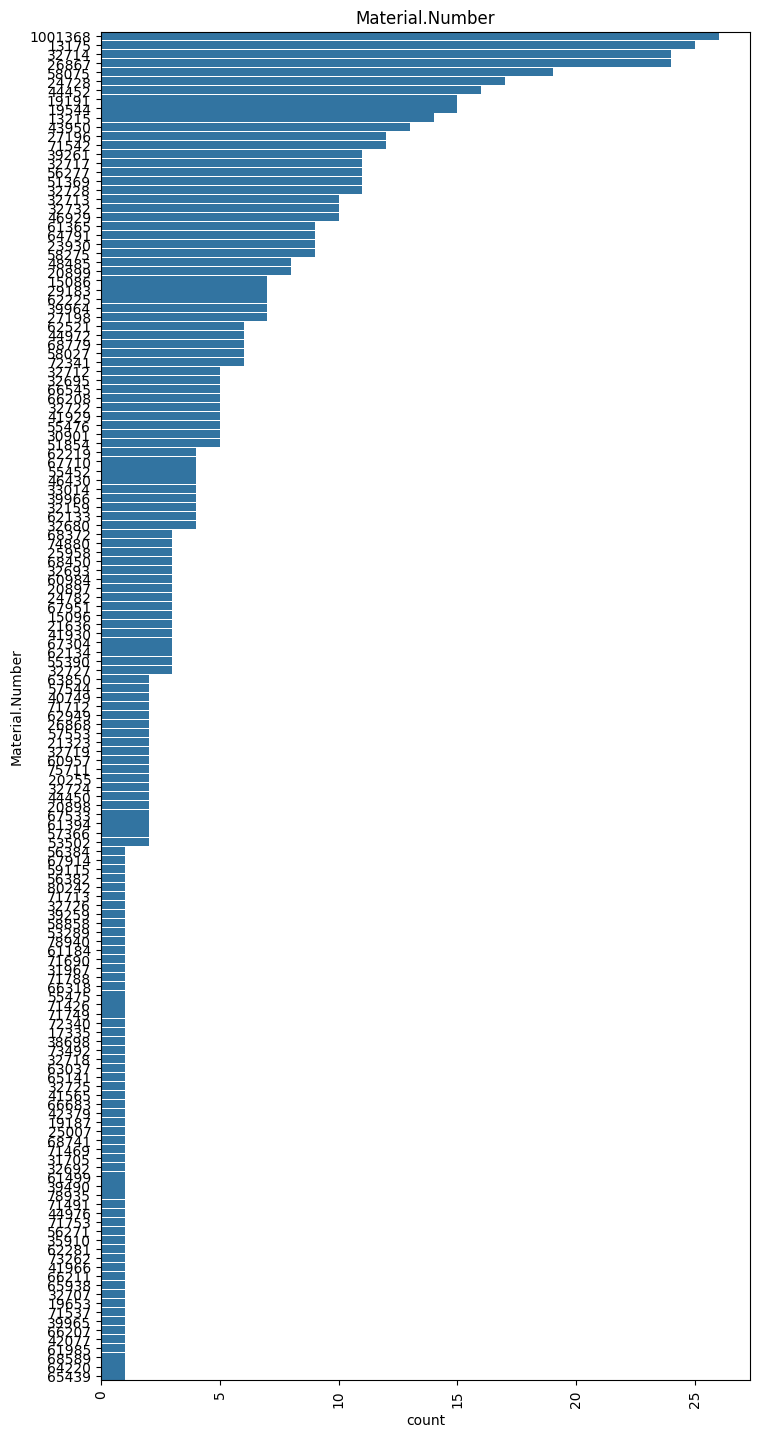

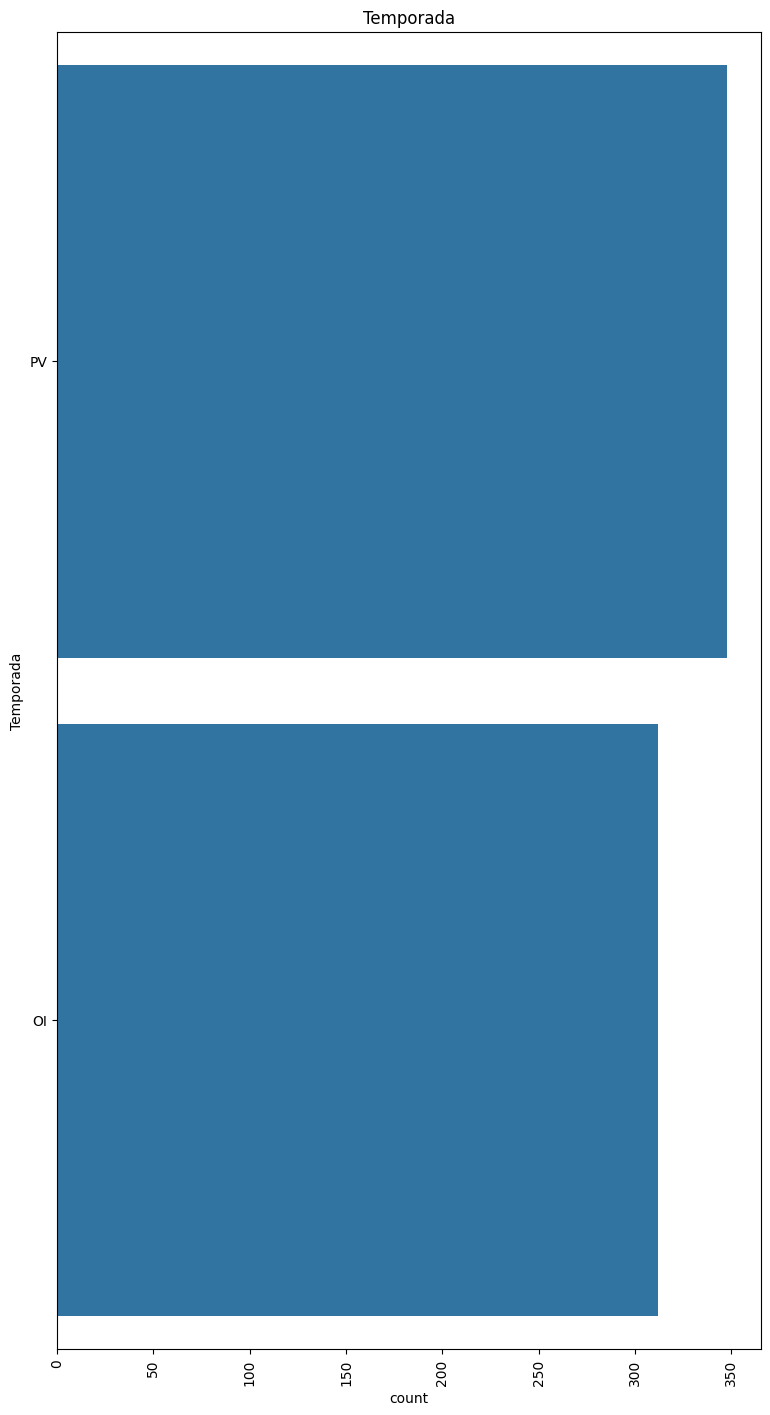

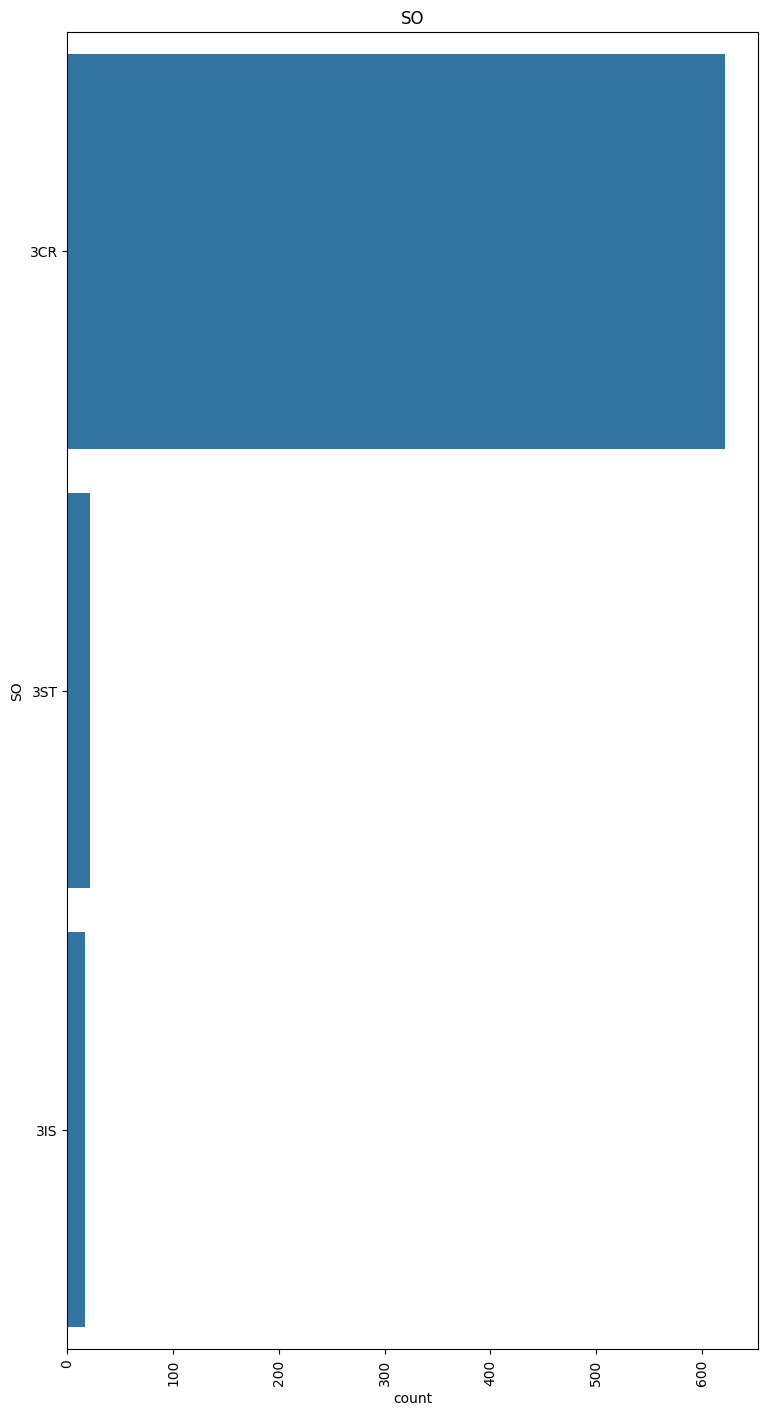

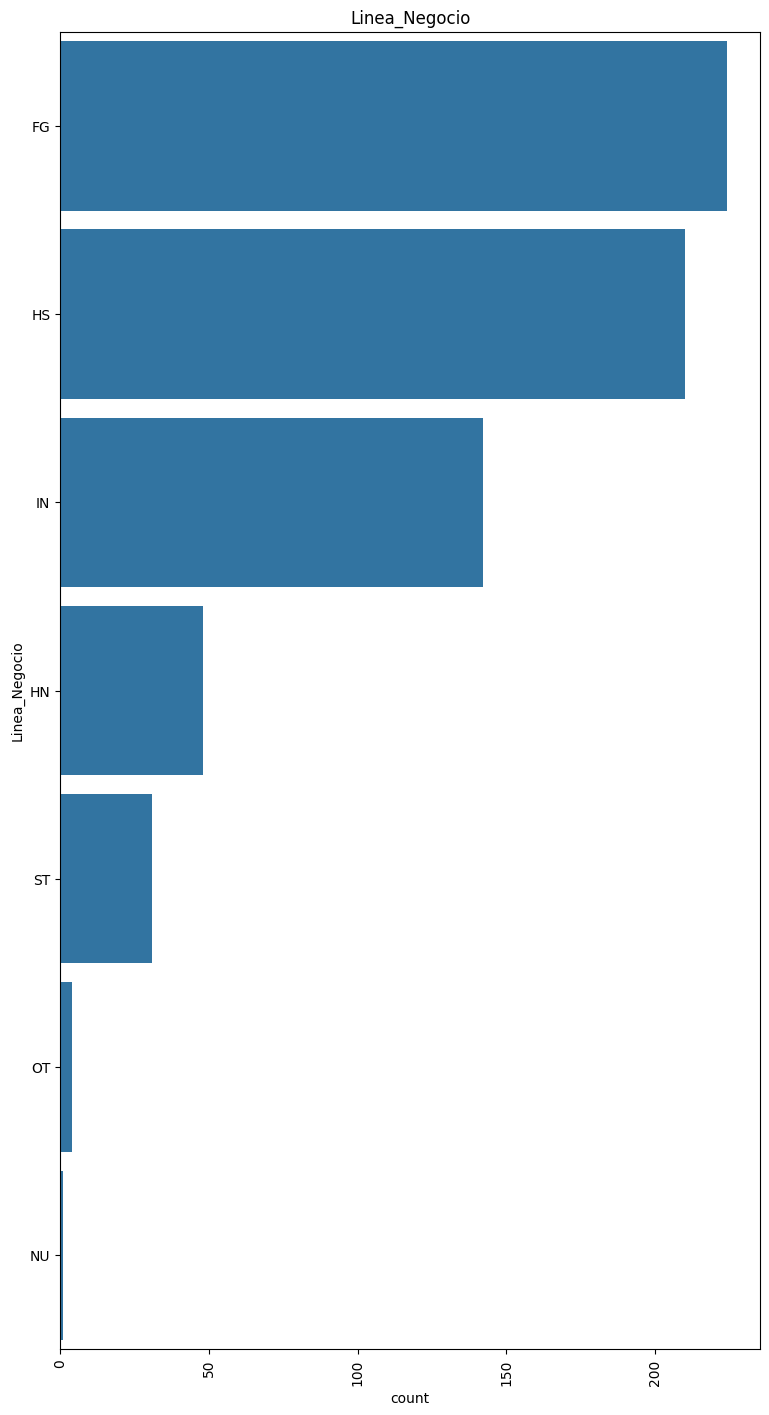

In [308]:
# Supongamos que 'vard' es una lista con las variables que deseas graficar
# y 'datos' es tu DataFrame con los datos

for feat in vard:
    sns.countplot(data=datos, y=feat, width=0.9, order=datos[feat].value_counts(ascending=False).index)
    plt.title(feat)
    plt.xticks(rotation=90)  # Rota las etiquetas del eje x en 90 grados
    plt.tight_layout()
    plt.gcf().set_size_inches(8, 17)
    plt.show()

## ¿Cómo visualizar las proporciones?

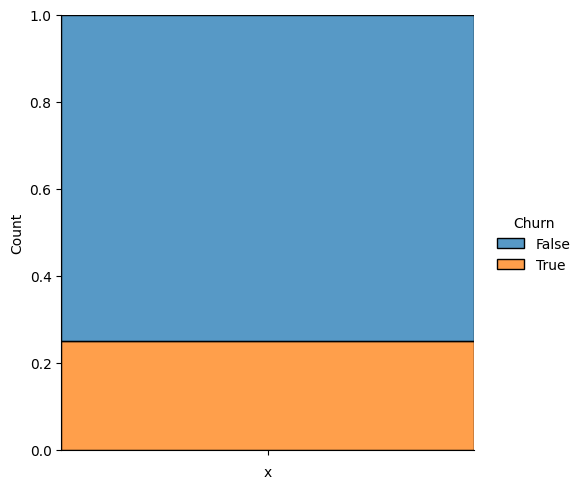

In [309]:
datos.add_column('x', '').pipe(
    lambda df: (
        sns.displot(
            data=df,
            x='x',
            hue='Churn',
            multiple='fill'
        )
    )
)

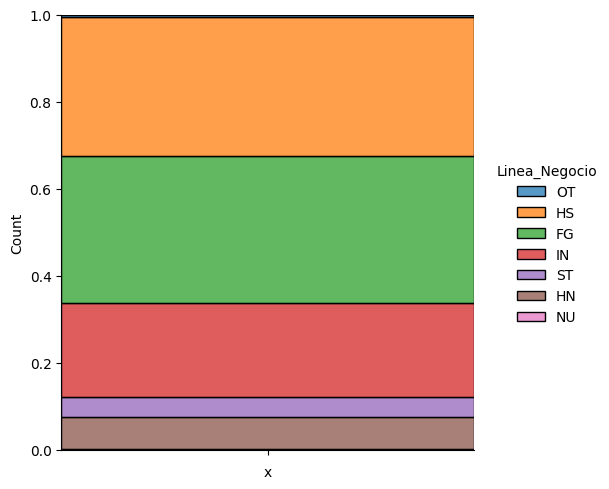

In [310]:
datos.add_column('x', '').pipe(
    lambda df: (
        sns.displot(
            data=df,
            x='x',
            hue='Linea_Negocio',
            multiple='fill'
        )
    )
)

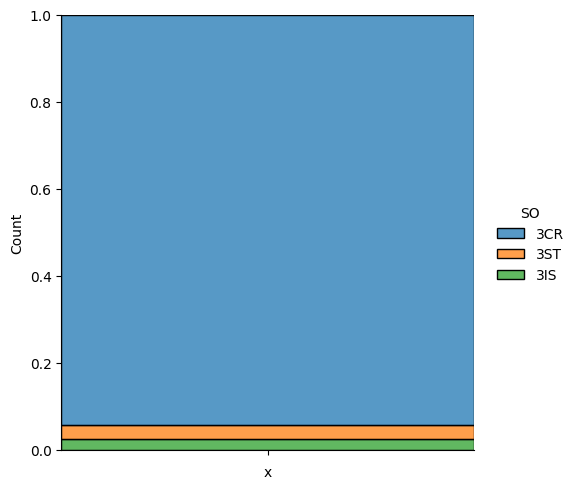

In [311]:
datos.add_column('x', '').pipe(
    lambda df: (
        sns.displot(
            data=df,
            x='x',
            hue='SO',
            multiple='fill'
        )
    )
)

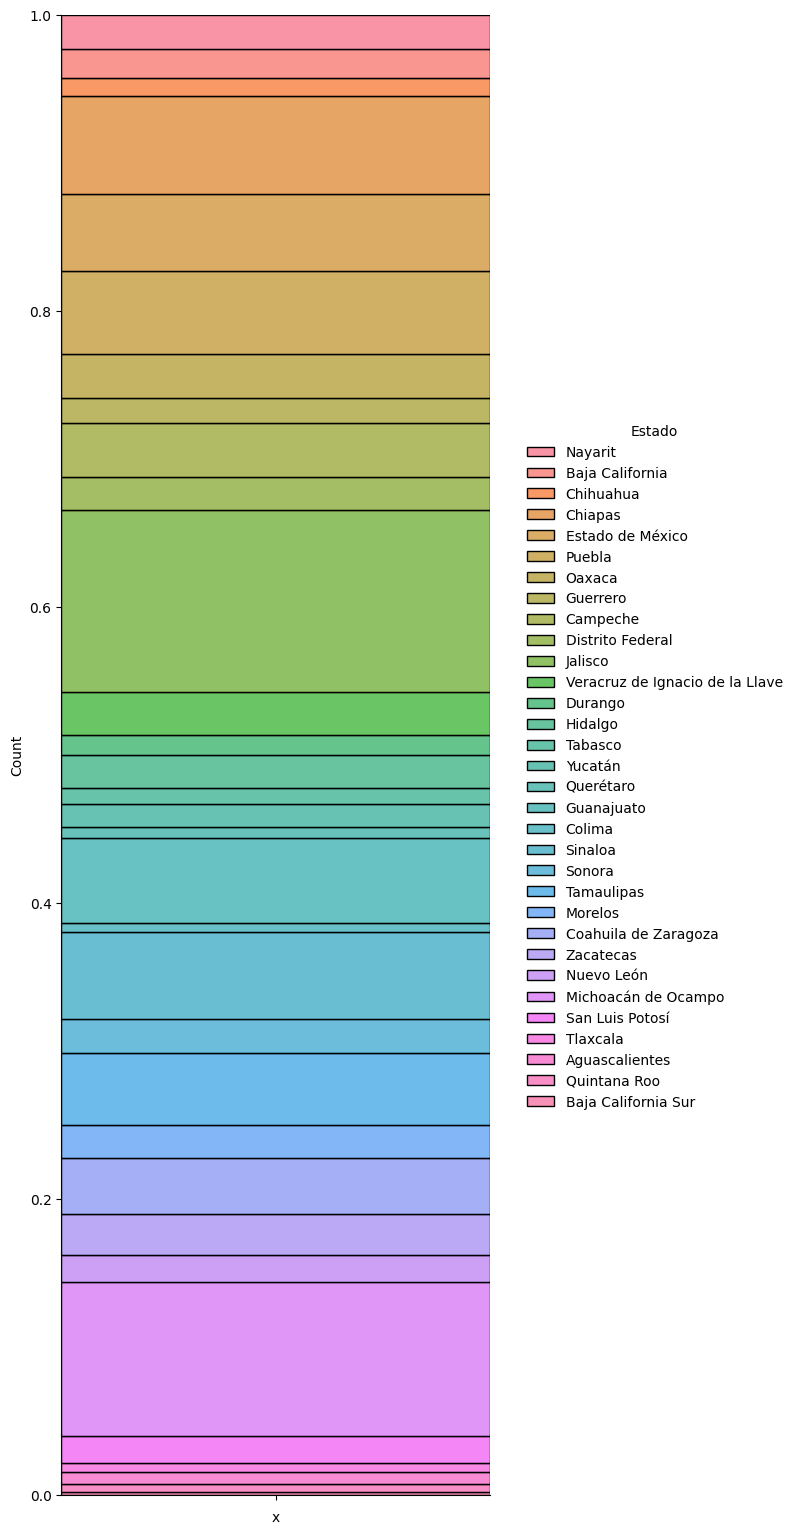

In [312]:
datos.add_column('x', '').pipe(
    lambda df: (
        sns.displot(
            data=df,
            x='x',
            hue='Estado',
            multiple='fill'
        )
    )
)
# plt.xticks(rotation=45)
plt.gcf().set_size_inches(8, 17)
plt.show()

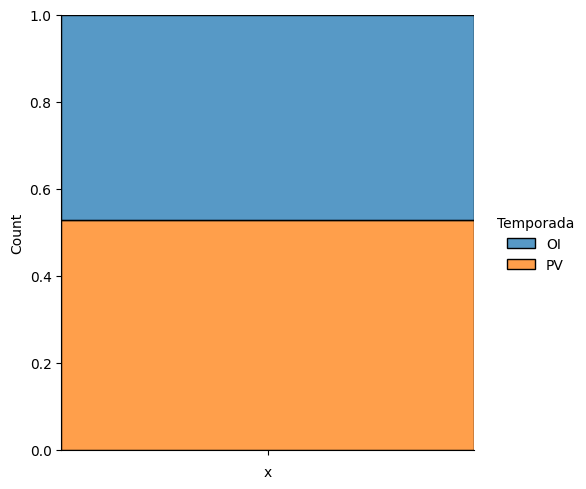

In [313]:
datos.add_column('x', '').pipe(
    lambda df: (
        sns.displot(
            data=df,
            x='x',
            hue='Temporada',
            multiple='fill'
        )
    )
)
# plt.xticks(rotation=45)
# plt.gcf().set_size_inches(8, 17)
plt.show()

## Proporsiones de una variable respecto al Churn

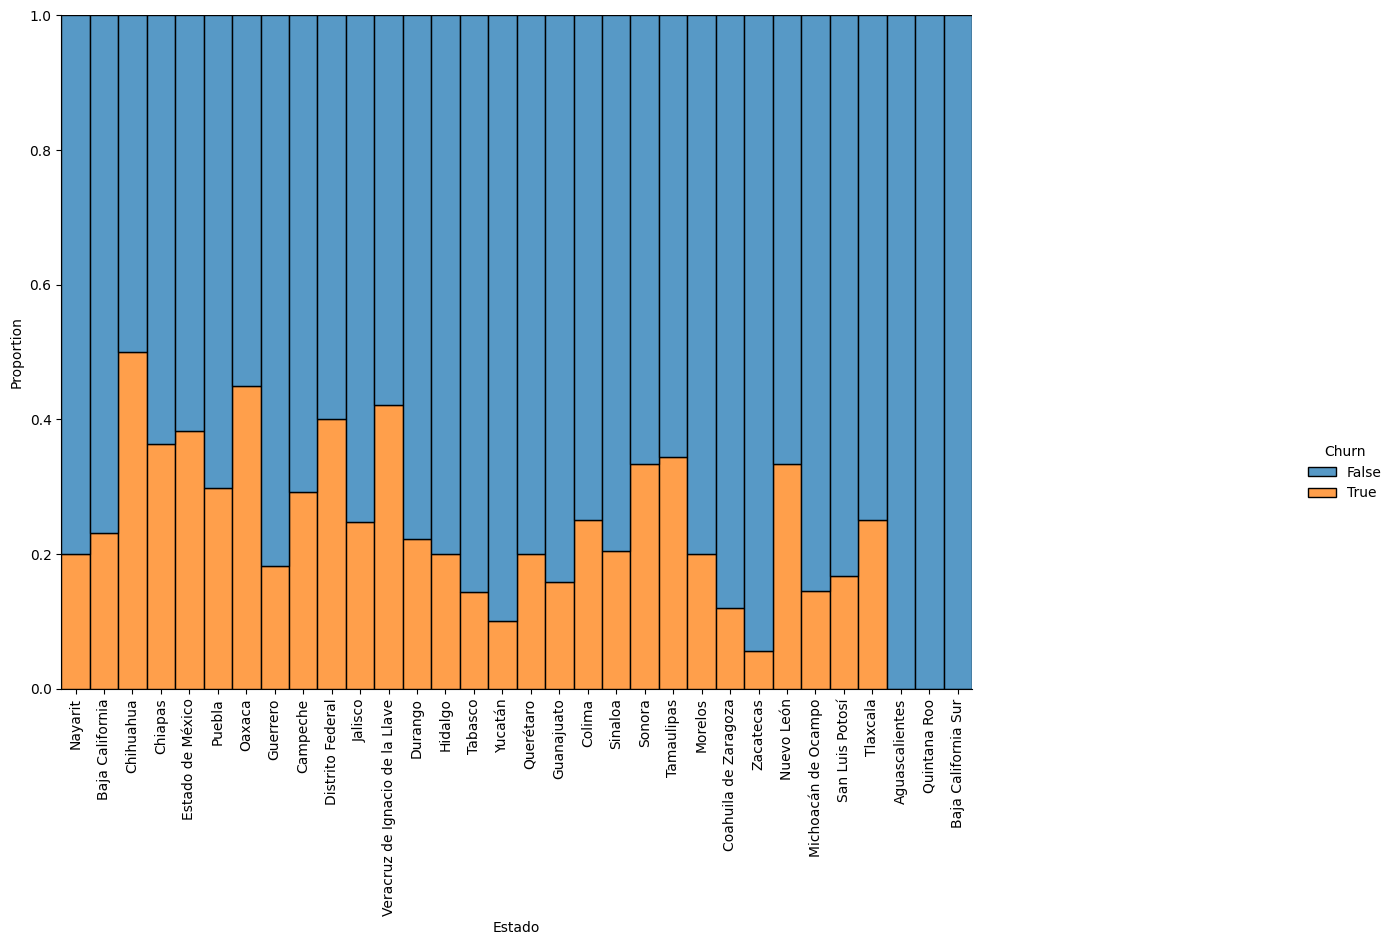

In [314]:
(
    datos
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='Estado',
                hue='Churn',
                multiple='fill',
                # palette=datos,
                stat='proportion',
                
            )
        )
    )
)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
plt.show()

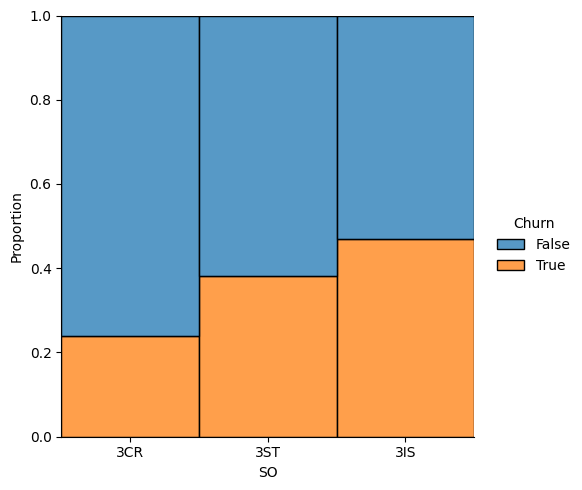

In [315]:
(
    datos
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='SO',
                hue='Churn',
                multiple='fill',
                # palette=datos,
                stat='proportion'
            )
        )
    )
)

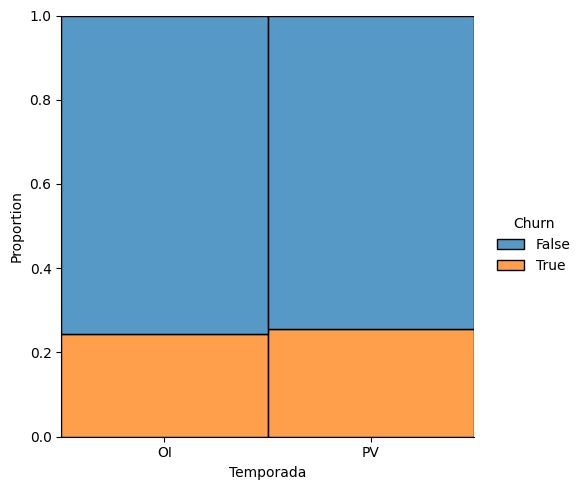

In [316]:
(
    datos
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='Temporada',
                hue='Churn',
                multiple='fill',
                # palette=datos,
                stat='proportion'
            )
        )
    )
)

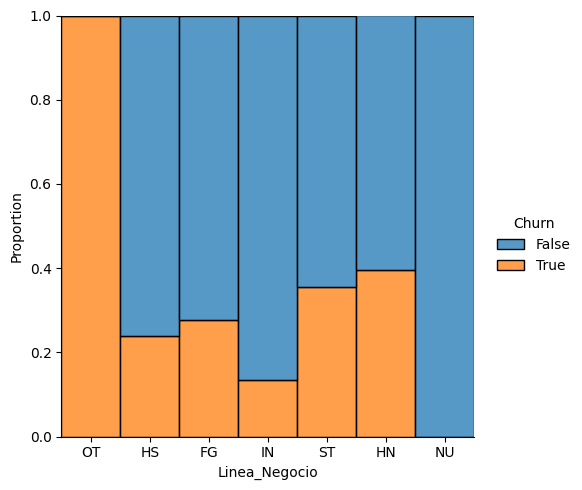

In [317]:
(
    datos
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='Linea_Negocio',
                hue='Churn',
                multiple='fill',
                # palette=datos,
                stat='proportion'
            )
        )
    )
)

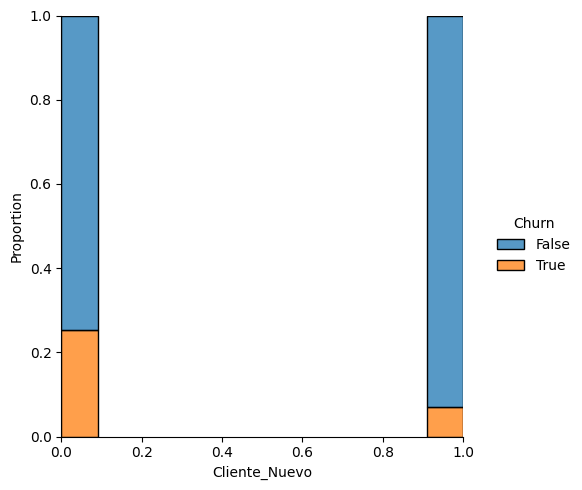

In [318]:
(
    datos
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='Cliente_Nuevo',
                hue='Churn',
                multiple='fill',
                # palette=datos,
                stat='proportion'
            )
        )
    )
)

In [319]:
datos['bp_id'] = datos['bp_id'].astype('str')
datos.columns.values

array(['bp_id', 'Estado', 'Territorio', 'FechaRegistro',
       'Material.Number', 'Temporada', 'SO', 'Linea_Negocio', 'Date_Last',
       'CohortDay', 'Ship_to', 'Devolucion', 'Volumen', 'Consumo', 'Frec',
       'Venta_2020', 'Venta_2021', 'Venta_2022', 'Venta_2023', 'Compro',
       'Crecimiento_21vs20', 'Crecimiento_22vs21', 'Crecimiento_23vs22',
       'Tiempo_ultima_compra', 'Anio_Registro', 'Cliente_Nuevo',
       'Antiguedad', 'percentile_75', 'Compra_unica', 'Churn'],
      dtype=object)

In [320]:
datos['ID'] = datos['bp_id']
datos['Churn'].value_counts(1)

Churn
False    0.75
True     0.25
Name: proportion, dtype: float64

In [321]:
datos["y"] = (datos["Churn"]==True).astype(int)

In [322]:
# Crear un DataFrame con los valores y etiquetas
labels = [False, True]
value_counts = datos['y'].value_counts()
total = len(datos['y'])

# Calcular las proporciones y porcentajes
proportions = value_counts / total
percentages = (value_counts / total) * 100

# Crear una lista de etiquetas personalizada con conteo y porcentaje
custom_labels = [f'{label} ({count}, {percent:.2f}%)' for label, count, percent in zip(labels, value_counts, percentages)]

# Crear la figura
fig = go.Figure(data=[go.Pie(labels=custom_labels, values=proportions, hole=0.5)])

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='label+percent',
    textfont_size=20,
    marker=dict(
        colors=['#ffb300', '#5f7800', '#abb400'],
        line=dict(color='#000000', width=2)
    ),
    pull=[0.1, 0.1]  # Controla la posición de las etiquetas por fuera de la gráfica
)

fig.update_layout(
    title={
        'text': "Distribución de Churn",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font=dict(
        family="Arial, monospace",
        size=20,
        color="#000000"
    )
)

fig.show()


Podemos notar gran desvalance en la clase de abandono

## Distribución de cada una de las variables numericas para el modelo.

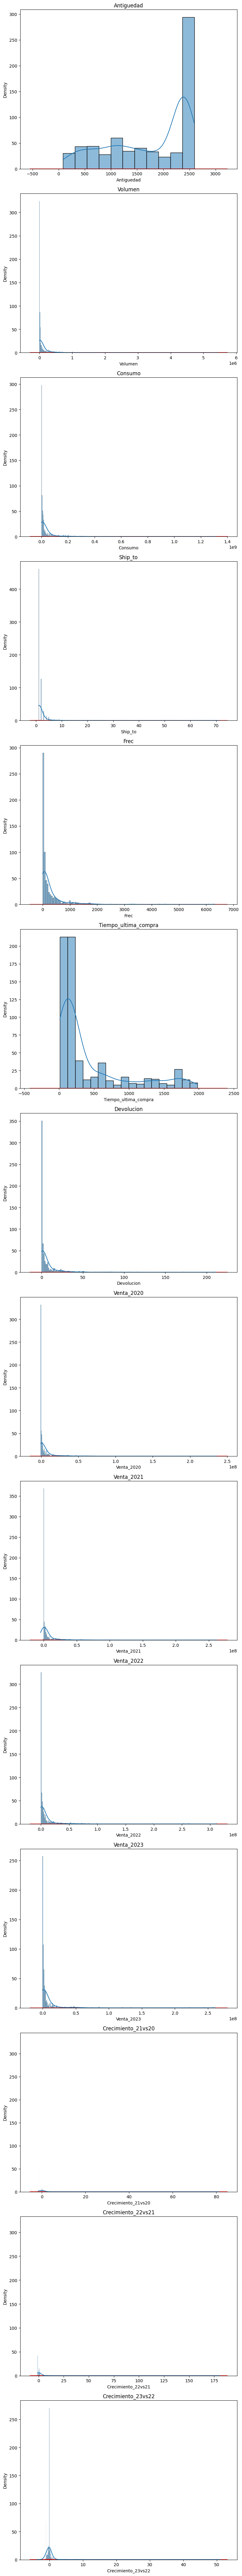

In [323]:
fig, axes = plt.subplots(len(varc), 1, figsize=(8, 6*len(varc)))

for i, feat in enumerate(varc):
    ax = axes[i]
    sns.kdeplot(datos[feat], ax=ax, color='red')
    sns.histplot(datos[feat], ax=ax, kde=True)
    ax.set_title(feat)

plt.tight_layout()
plt.show()

Distribución del tiempo desde la ultima compra:

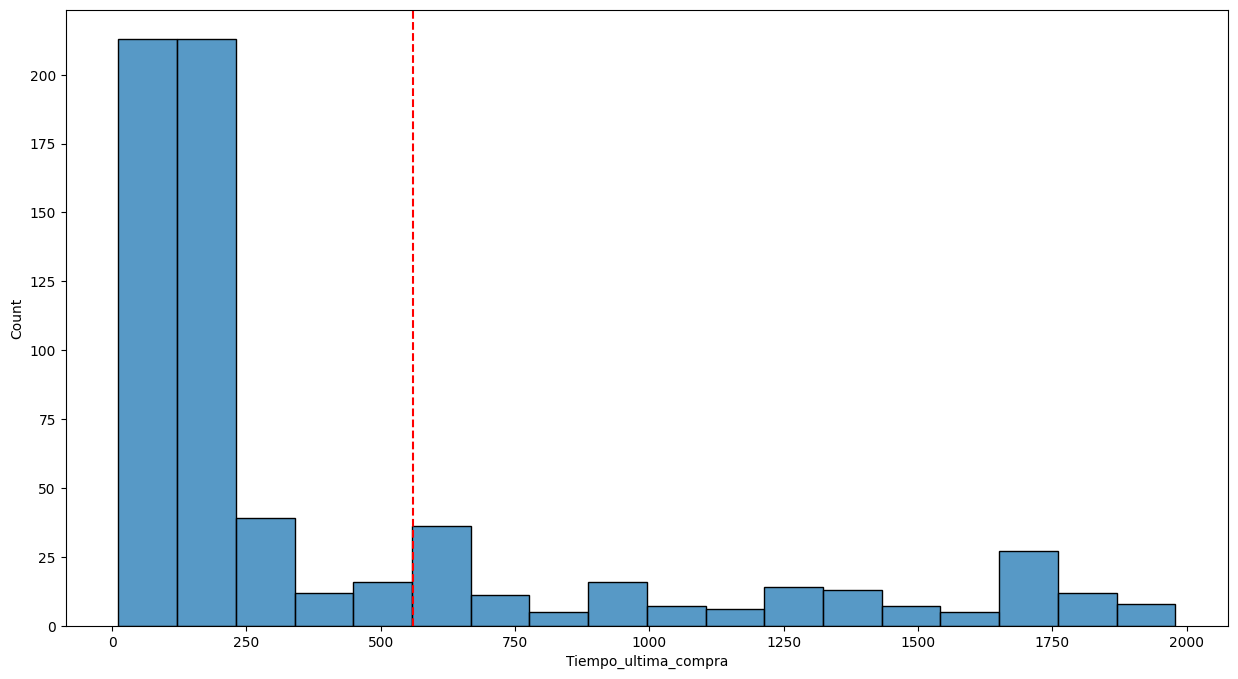

In [324]:
sns.histplot(
    data=datos,
    x='Tiempo_ultima_compra'
)
plt.axvline(
    x=datos.Tiempo_ultima_compra.quantile(0.75),
    color='red',
    linestyle='dashed'
)
plt.gcf().set_size_inches(15, 8)
plt.show()

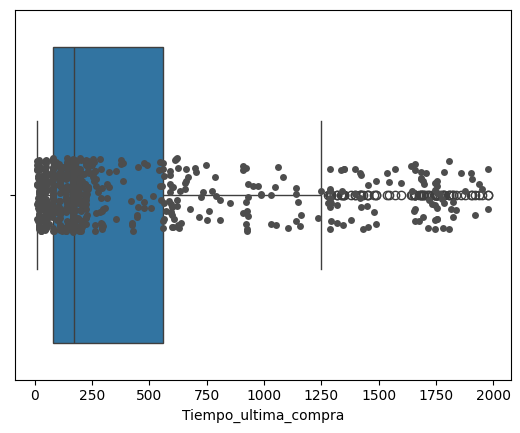

In [325]:
sns.boxplot(
    x=datos.Tiempo_ultima_compra,
    # whis=[0.5, 0.75]
)
ax = sns.stripplot(
    data=datos,
    x='Tiempo_ultima_compra',
    color='.3'
)

In [326]:
varc

['Antiguedad',
 'Volumen',
 'Consumo',
 'Ship_to',
 'Frec',
 'Tiempo_ultima_compra',
 'Devolucion',
 'Venta_2020',
 'Venta_2021',
 'Venta_2022',
 'Venta_2023',
 'Crecimiento_21vs20',
 'Crecimiento_22vs21',
 'Crecimiento_23vs22']

# Analisis Bivariado

In [327]:
import plotly.graph_objects as go
# Elige un color (por ejemplo, azul)
constant_color = '#1f77b4'

fig = go.Figure(data=go.Splom(
    dimensions=[
        dict(label='Antiguedad', values=datos['Antiguedad']),
        dict(label='Volumen', values=datos['Volumen']),
        dict(label='Consumo', values=datos['Consumo']),
        dict(label='Ultima_compra', values=datos['Tiempo_ultima_compra']),
        dict(label='Frecuencia', values=datos['Frec']),
        dict(label='Devoluciones', values=datos['Devolucion'])
    ],
    marker=dict(color=constant_color, size=5, showscale=False, line_color='white', line_width=0.5)
))

fig.update_layout(title='Clientes dimensions', width=800, height=800, hovermode='closest')
fig.show()

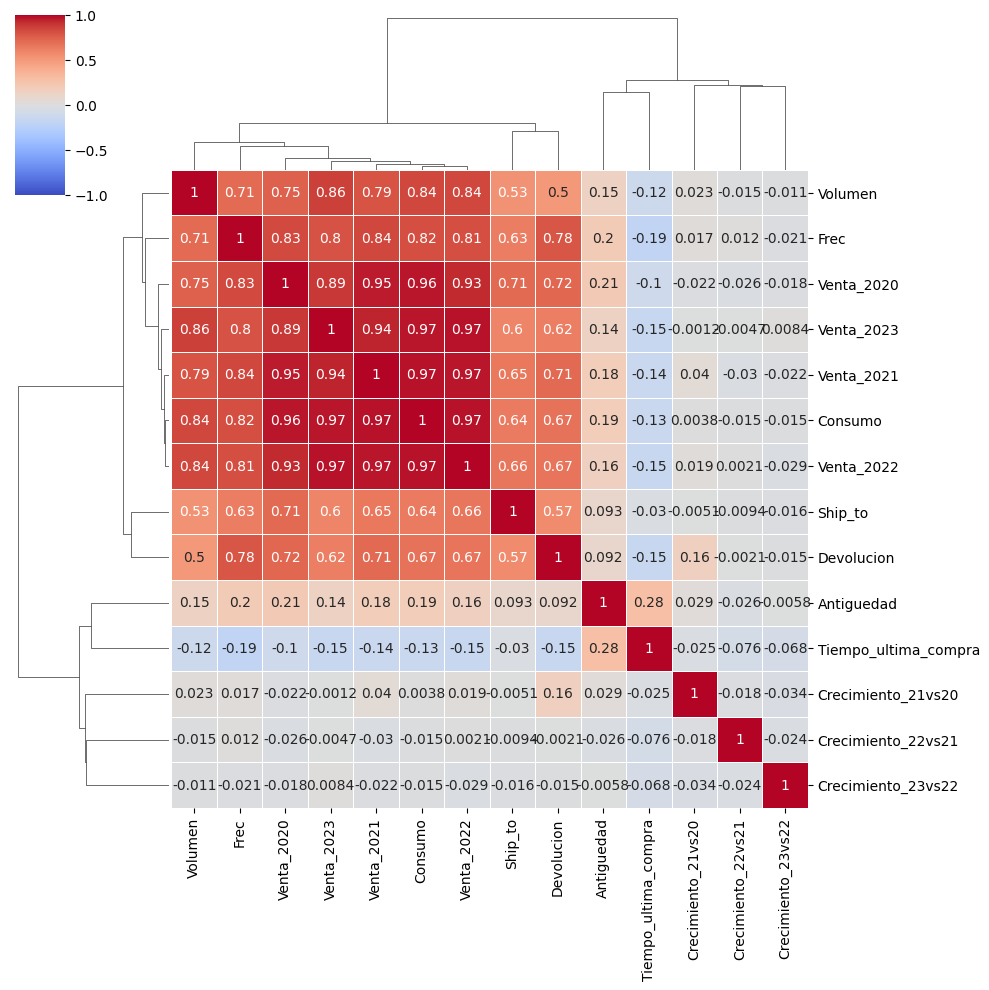

In [328]:
sns.clustermap(
    data=datos[varc].corr(),
    cmap='coolwarm', # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

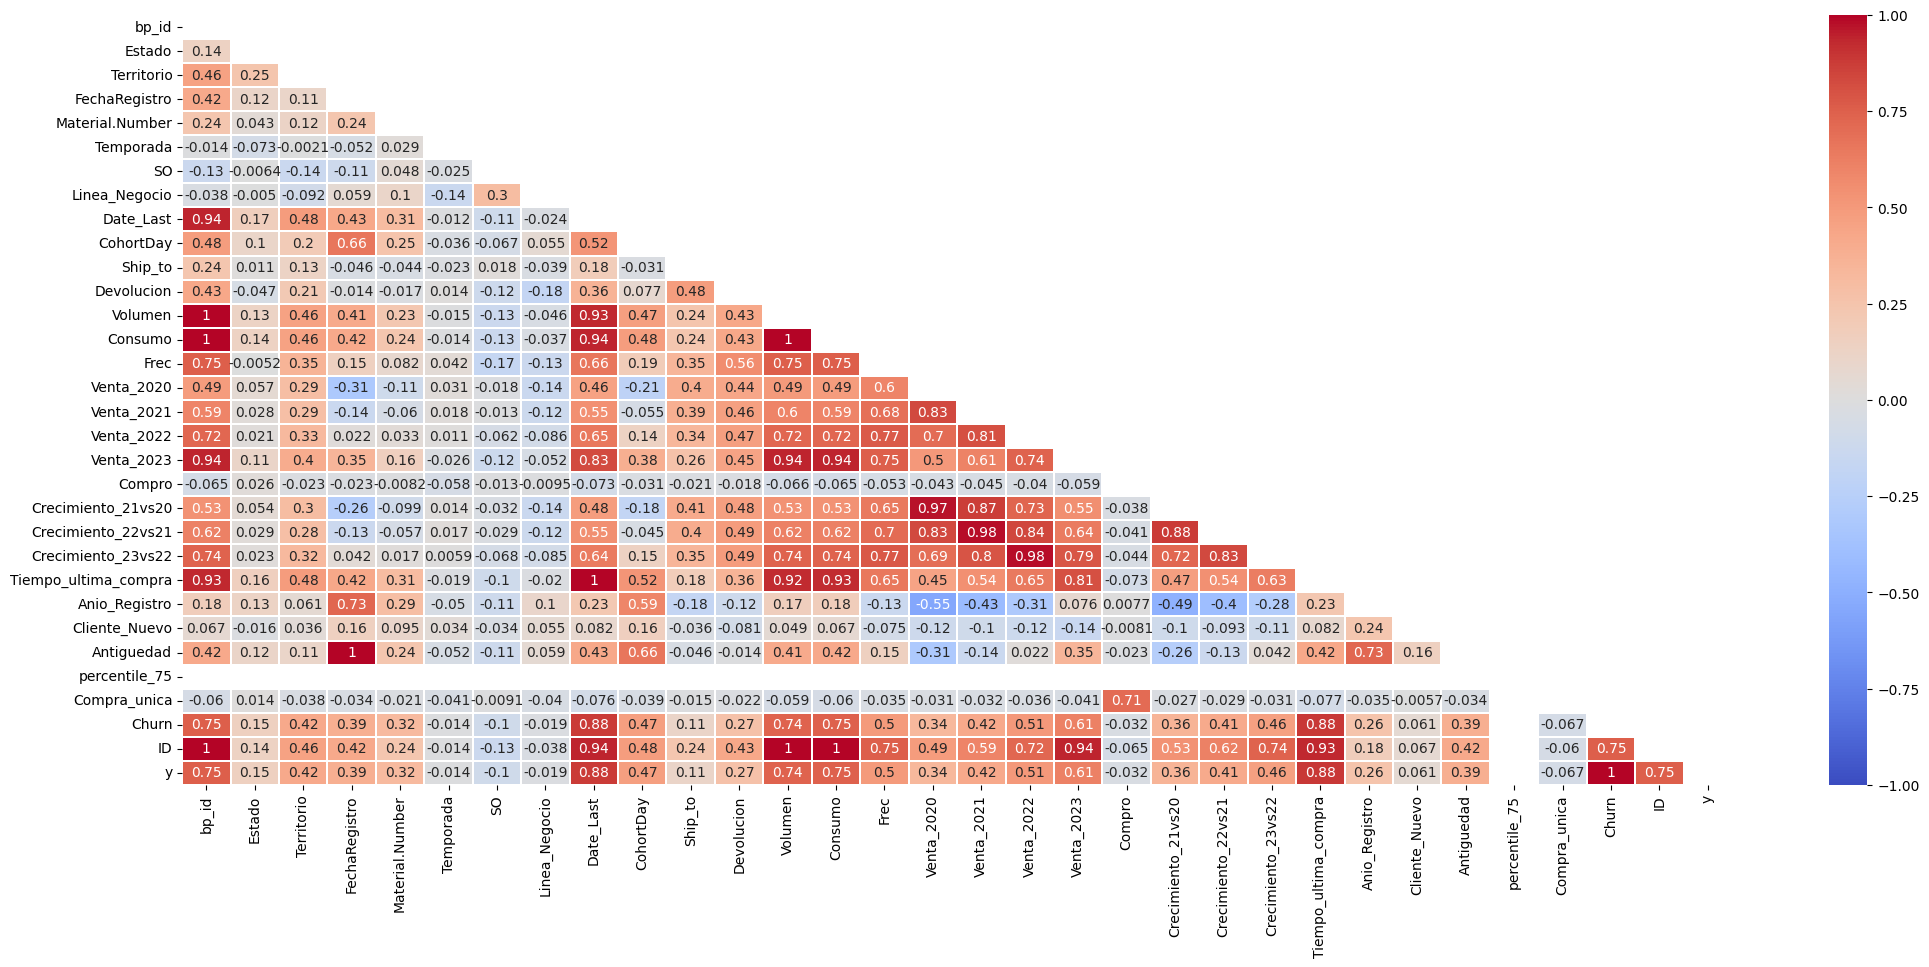

In [329]:
plt.figure(figsize=(25, 10))

corr = datos.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

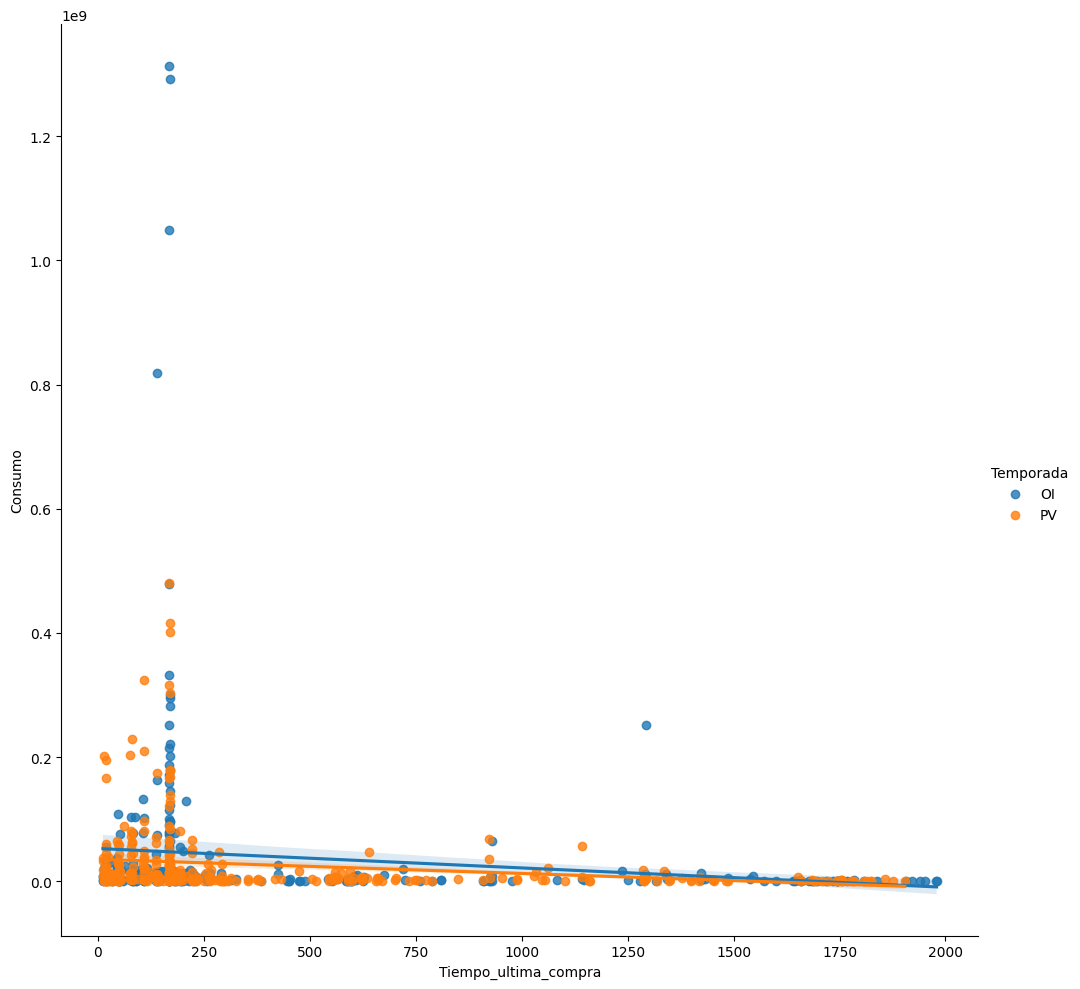

In [330]:
sns.lmplot(
    data=datos,
    x='Tiempo_ultima_compra',
    y='Consumo',
    hue='Temporada',
    height=10
)

In [331]:
datos.columns

Index(['bp_id', 'Estado', 'Territorio', 'FechaRegistro', 'Material.Number',
       'Temporada', 'SO', 'Linea_Negocio', 'Date_Last', 'CohortDay', 'Ship_to',
       'Devolucion', 'Volumen', 'Consumo', 'Frec', 'Venta_2020', 'Venta_2021',
       'Venta_2022', 'Venta_2023', 'Compro', 'Crecimiento_21vs20',
       'Crecimiento_22vs21', 'Crecimiento_23vs22', 'Tiempo_ultima_compra',
       'Anio_Registro', 'Cliente_Nuevo', 'Antiguedad', 'percentile_75',
       'Compra_unica', 'Churn', 'ID', 'y'],
      dtype='object')

In [332]:
vard

['Territorio',
 'Estado',
 'Cliente_Nuevo',
 'Anio_Registro',
 'Compra_unica',
 'Material.Number',
 'Temporada',
 'SO',
 'Linea_Negocio']

In [333]:
varc

['Antiguedad',
 'Volumen',
 'Consumo',
 'Ship_to',
 'Frec',
 'Tiempo_ultima_compra',
 'Devolucion',
 'Venta_2020',
 'Venta_2021',
 'Venta_2022',
 'Venta_2023',
 'Crecimiento_21vs20',
 'Crecimiento_22vs21',
 'Crecimiento_23vs22']